In [1]:
import time

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv('IRIS.csv')

df = dataset.copy()  # dataframe
x = df.drop(['species'], axis=1)  # тренировочные/тестовые данные
y = df['species']  # ответы для нейросети

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
# разделение данных на обучающие и тренировачные(x_train - input, y_train - output)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the features
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

new_y_train = []
for i in range(len(y_train)):
    new_y_train.append([1 if j == y_train[i] else 0 for j in range(3)])
y_train = new_y_train

new_y_test = []
for i in range(len(y_test)):
    new_y_test.append([1 if j == y_test[i] else 0 for j in range(3)])
y_test = new_y_test



In [107]:
np.random.seed(1)

alpha, iterations, hidden_size, input_d, num_labels = (0.001, 200, 18, 4, 3)

weights_0_1 = 0.2 * np.random.random((input_d, hidden_size)) - 0.1
weights_1_2 = 0.2 * np.random.random((hidden_size, num_labels)) - 0.1


 I:0 Error:0.670 Correct:0.5083333333333333 Test-Err:0.996 Test-Acc:0.4
 I:1 Error:0.667 Correct:0.5666666666666667
 I:2 Error:0.664 Correct:0.36666666666666664
 I:3 Error:0.661 Correct:0.3416666666666667
 I:4 Error:0.658 Correct:0.3416666666666667
 I:5 Error:0.655 Correct:0.3416666666666667
 I:6 Error:0.652 Correct:0.3416666666666667
 I:7 Error:0.649 Correct:0.3416666666666667
 I:8 Error:0.646 Correct:0.3416666666666667
 I:9 Error:0.641 Correct:0.3416666666666667
 I:10 Error:0.637 Correct:0.3333333333333333 Test-Err:0.921 Test-Acc:0.3
 I:11 Error:0.632 Correct:0.325
 I:12 Error:0.626 Correct:0.30833333333333335
 I:13 Error:0.619 Correct:0.175
 I:14 Error:0.612 Correct:0.175
 I:15 Error:0.605 Correct:0.45
 I:16 Error:0.597 Correct:0.6083333333333333
 I:17 Error:0.590 Correct:0.65
 I:18 Error:0.583 Correct:0.6583333333333333
 I:19 Error:0.576 Correct:0.6583333333333333
 I:20 Error:0.568 Correct:0.6583333333333333 Test-Err:0.855 Test-Acc:0.7
 I:21 Error:0.560 Correct:0.6583333333333333


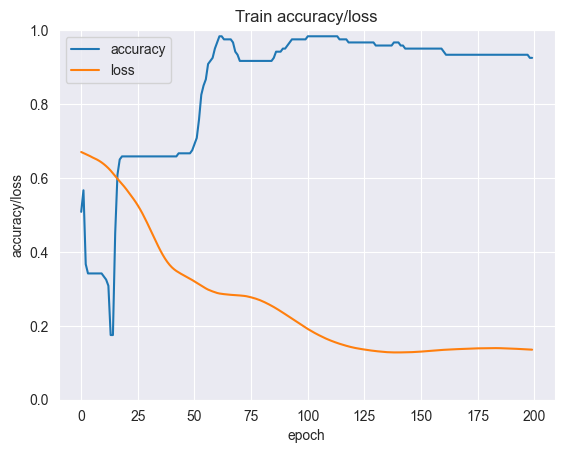

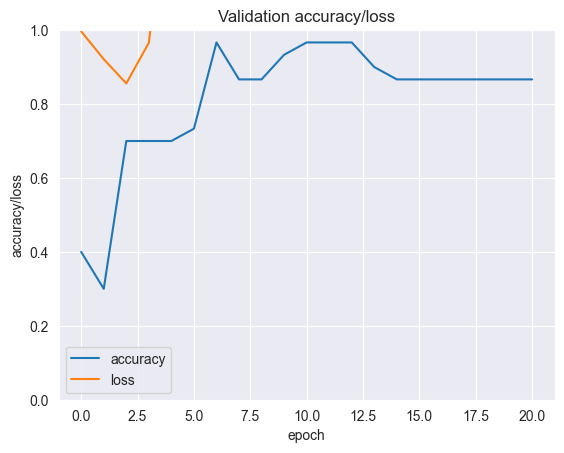

In [108]:
def relu(node):  # activation function
    return (node >= 0) * node

def relu2deriv(output):  # derivative of activation function
    return output >= 0

def tanh(x):
    return np.tanh(x)

def tanh2deriv(output):
    return 1 - (output ** 2)

def softmax(ner):
    temp = np.exp(ner)
    return temp / np.sum(temp, axis=1, keepdims=True)

loss = []
accuracy = []

loss_test = []
accuracy_test = []

for interation in range(iterations):
    error, correct_cnt = (0.0, 0)
    for i in range(len(x_train)):
        layer_0 = x_train[i:i + 1]
        layer_1 = relu(np.dot(layer_0, weights_0_1))
        # dropout_mask = np.random.randint(2,size=layer_1.shape)
        # layer_1 *= dropout_mask * 2
        layer_2 = softmax(np.dot(layer_1, weights_1_2))

        error += np.sum((layer_2 - y_train[i:i + 1]) ** 2)

        correct_cnt += int(np.argmax(layer_2) == np.argmax(y_train[i:i + 1]))

        layer_2_delta = (y_train[i:i + 1] - layer_2)
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)
        # layer_1_delta *= dropout_mask

        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

    sys.stdout.write(
        "\n" + " I:" + str(interation) + " Error:" + str(error / float(len(x_train)))[0:5] + " Correct:" + str(
            correct_cnt / float(len(x_train))))
    loss.append(error / float(len(x_train)))
    accuracy.append(correct_cnt / float(len(x_train)))

    if interation % 10 == 0 or interation == iterations - 1:
        error, correct_cnt = (0.0, 0)
        for i in range(len(x_test)):
            layer_0 = x_test[i:i + 1]
            layer_1 = relu(np.dot(layer_0, weights_0_1))
            layer_2 = np.dot(layer_1, weights_1_2)

            error += np.sum((y_test[i:i + 1] - layer_2) ** 2)
            correct_cnt += int(np.argmax(layer_2) == np.argmax(y_test[i:i + 1]))

        sys.stdout.write(
            " Test-Err:" + str(error / float(len(x_test)))[0:5] + " Test-Acc:" + str(correct_cnt / float(len(x_test))))
        loss_test.append(error / float(len(x_test)))
        accuracy_test.append(correct_cnt / float(len(x_test)))

plt.plot([i for i in range(len(accuracy))], accuracy, label="accuracy")
plt.plot([i for i in range(len(loss))], loss, label="loss")
plt.title('Train accuracy/loss')
plt.xlabel('epoch')
plt.ylabel('accuracy/loss')
plt.legend(loc=0)
plt.ylim(0, 1)
plt.show()

plt.plot([i for i in range(len(accuracy_test))], accuracy_test, label="accuracy")
plt.plot([i for i in range(len(loss_test))], loss_test, label="loss")
plt.title('Validation accuracy/loss')
plt.xlabel('epoch')
plt.ylabel('accuracy/loss')
plt.legend(loc=0)
plt.ylim(0, 1)
plt.show()

Ручной ввод данных

In [127]:

ans = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
while True:
    sepal_length = float(input("sepal_length = "))
    sepal_width = float(input("sepal_width = "))
    petal_length = float(input("petal_length = "))
    petal_width = float(input("petal_width = "))

    for i in range(len(x_test)):
        layer_0 = [sepal_length, sepal_width, petal_length, petal_width]
        layer_1 = relu(np.dot(layer_0, weights_0_1))
        layer_2 = np.dot(layer_1, weights_1_2)
    ind = np.argmax(layer_2)
    print(layer_2)
    print(ans[ind])
    time.sleep(2)

[ 3.64756224  0.09454179 -3.41788424]
Iris-setosa
[-2.22048783  1.6525621   0.77489636]
Iris-versicolor


ValueError: could not convert string to float: ''